# Dataset selection

This is a dataset on the characteristics of breast cancer tumor biopsies and whether they are malign or benin. 
- https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

The following is an initial exploration of the data

In [62]:
import numpy as np
import mpld3
import json
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd

In [63]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        import numpy as np
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)
from mpld3 import _display
_display.NumpyEncoder = NumpyEncoder

In [2]:
data = []
with open('data.csv', 'r') as f:
    for n,l in enumerate(f):
        ls = l.strip().split(',')
        if n==0:
            keys = [x.replace('"','') for x in ls]
            features = keys[2:-1]
            continue
        line = dict(zip(keys, ls))
        for f in features:
            line[f] = float(line[f])
        data.append(line)

In [16]:
X = np.array([[v for k,v in x.items() if k not in {'id', 'diagnosis'}] for x in data])

In [20]:
T = np.array([1. if x['diagnosis']=='M' else 0. for x in data])

In [3]:
print(len(data), len(features))

569 30


In [7]:
# Binary classes: B = benign, M = malign
classes = [x['diagnosis'] for x in data]
for c in set(classes):
    print(c, classes.count(c))


M 212
B 357


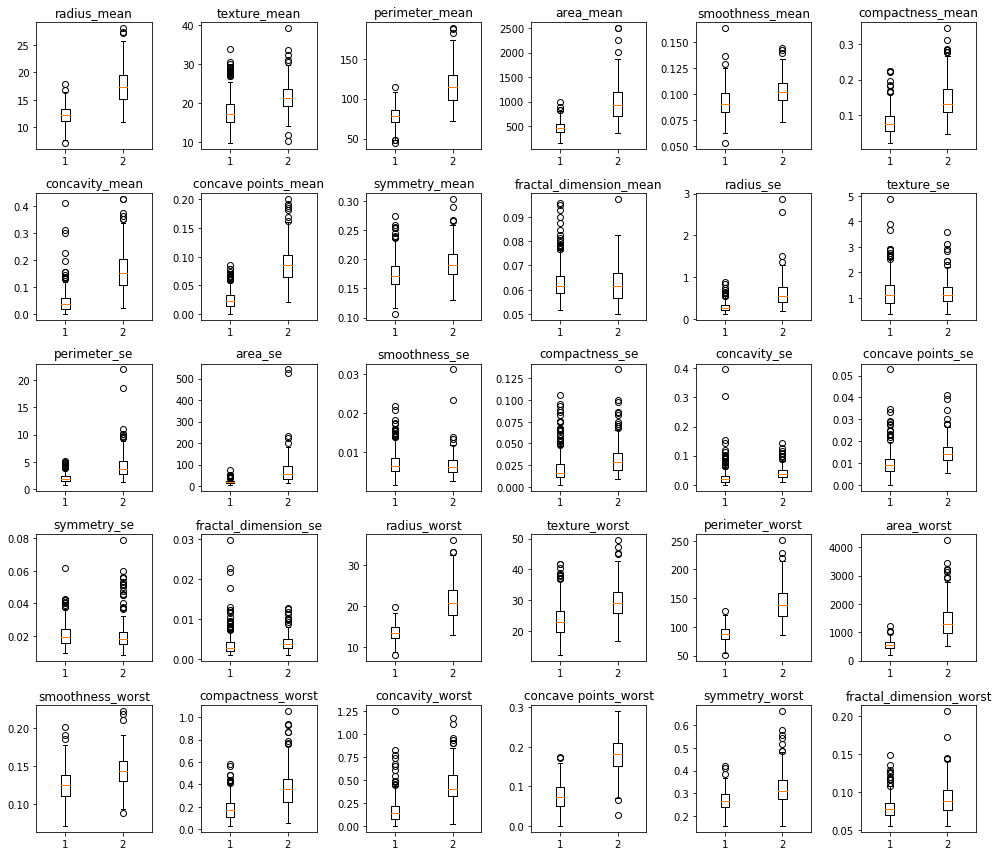

In [6]:
fig, axs = plt.subplots(5,6, figsize=(14,12), facecolor='w')
axs = axs.ravel()
for n,f in enumerate(features):
    axs[n].set_title(f)
    d = [[x[f] for x in data if x['diagnosis']==C] for C in ['B', 'M']]
    axs[n].boxplot(d)
    axs[n].set_xticks([1,2], ['benign','malign'])
plt.tight_layout()
plt.show()

In [65]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [67]:
target_ids   = range(2)
target_names = ['Benin', 'Malign']
fig = plt.figure(figsize=(6, 5))
for i, c, label in zip(target_ids, 'br', target_names):
    plt.scatter(X_pca[T == i, 0], X_pca[T == i, 1],
               c=c, label=label, alpha=0.6)
plt.legend()
mpld3.display(fig)
#plt.show()

In [68]:
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

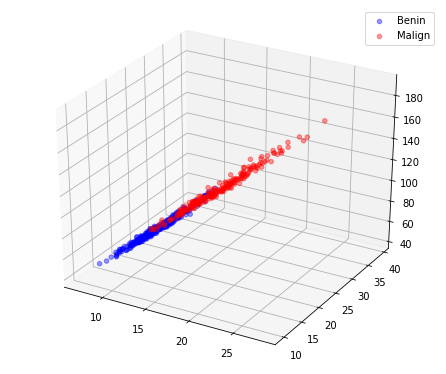

In [69]:
target_ids   = range(2)
target_names = {0.:'Benin', 1.:'Malign'}
fig = plt.figure(figsize=(6, 5))
ax = Axes3D(fig)
for i, c in zip([0.,1.],'br'):
    ax.scatter(X[T==i, 0], X[T==i, 1], X[T==i, 2], c=c, label=target_names[i])
plt.legend()
plt.show()

In [83]:
df = pd.DataFrame(X_pca)

In [97]:
c = ['Malign' if x == 1. else 'Benin' for x in T]

In [98]:
iris = px.data.iris()
fig = px.scatter_3d(df, x=0, y=1, z=2, color=c)
fig.show()